Package Installation

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 35.1 MB/s eta 0:00:00


Importing Required Libraries  

In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn import model_selection
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Loading dataset

In [3]:
# Load dataset
data = pd.read_csv('/content/PKBHX.csv')
print(data)

                                   SMILES  pK_BHX
0                      CC(=[O:1])c1cccnc1    0.90
1                           C1COCC[NH:1]1    1.78
2                           C1CSCC[NH:1]1    1.67
3                            C1CSC[NH:1]1    1.10
4                           C[N:1]1CCOCC1    1.56
..                                    ...     ...
988           OP1(=[O:1])OCCC(O1)c1ccccc1    2.38
989          CC(C)C1OP(O)(=[O:1])OCC1(C)C    2.40
990                      CN1CN(C)C1=[O:1]    2.46
991  CCN(CC(=[O:1])N(CC)c1ccccc1)c1ccccc1    2.16
992                 CN(C)C=[N:1]CC(C)(C)C    2.26

[993 rows x 2 columns]


Feature Extraction

In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from rdkit.Chem import MACCSkeys, MolFromSmiles

fps = [MACCSkeys.GenMACCSKeys(MolFromSmiles(smi)) for smi in data['SMILES']]

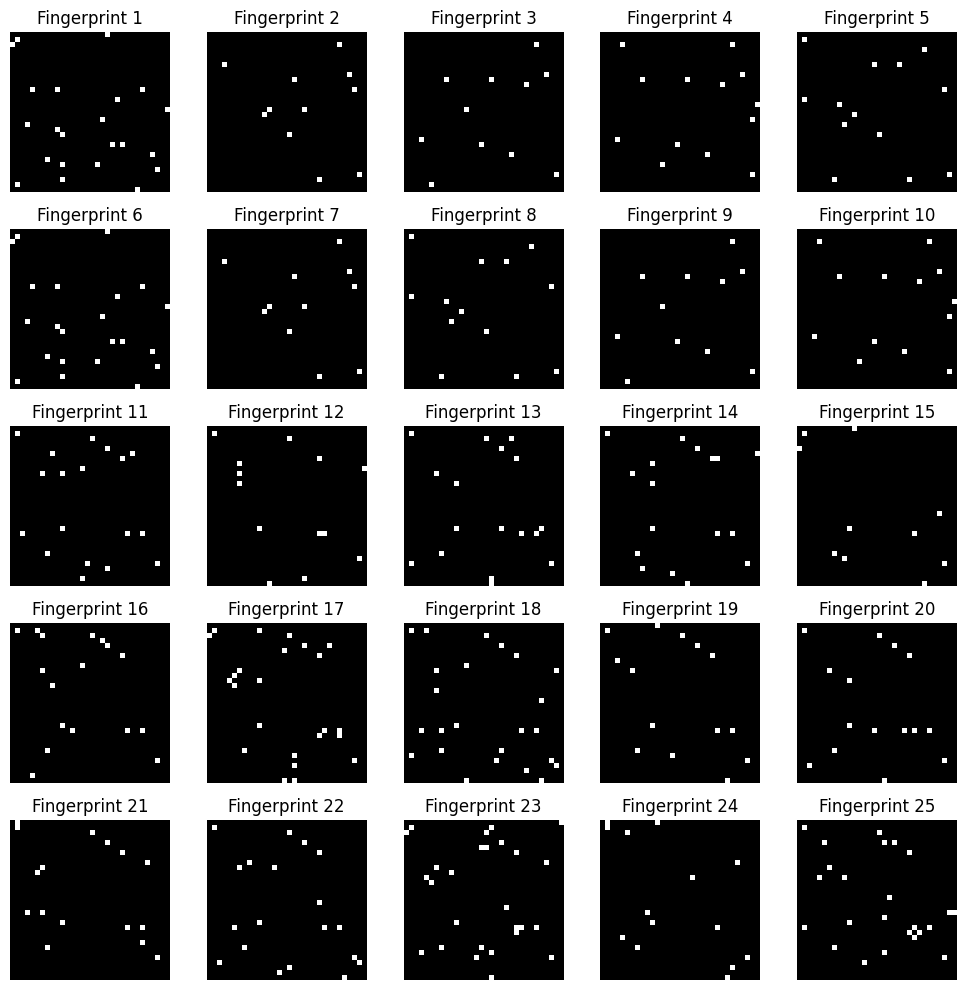

In [6]:
# Generate fingerprints
import numpy as np
import matplotlib.pyplot as plt
fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), 2, nBits=1024) for smi in data['SMILES']]
# Convert fingerprints to numpy arrays
fps_arr = np.asarray(fps)

# Plot the fingerprints as images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    ax.imshow(fps_arr[i].reshape((32, 32)), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Fingerprint {i+1}")

plt.tight_layout()
plt.show()

Machine Learning Model for Prediction of pK_BHX

In [7]:
X_train, X_test, y_train, y_test = train_test_split(fps, data['pK_BHX'], test_size=0.2, random_state=42)

RandomForestRegressor

In [8]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

RandomForestRegressor evaluation using MSE and R2

In [9]:
# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.32
R-squared: 0.65


Visaulizing the Molecules

In [10]:
new_smiles = ['CC(=O)OC1CCCCC1C(=O)O’']
mol1 = Chem.MolFromSmiles('CC(=O)OC1CCCCC1C(=O)O’')
img1 = Draw.MolToImage(mol1)
img1.show()


Predicted Pk_BHX Value using Random Forest Regressor

In [11]:
new_fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), 2, nBits=1024) for smi in new_smiles]
new_pk_bhx = model.predict(new_fps)
print(f'Predicted Pk_BHX values: {new_pk_bhx}')

Predicted Pk_BHX values: [1.08383066]


Predicting Pk_BHX Value using Support Vector Regressor

In [12]:
from sklearn.svm import SVR

In [13]:
from sklearn.svm import SVR

# Define and initialize the SVR model with appropriate parameters
model = SVR(kernel='rbf', C=10, gamma='scale')

# Train the model using the training data
model.fit(X_train, y_train)

SVR(C=10)

Evalution of SVR

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.25
R-squared: 0.72


Predicted Pk_BHX value using SVR

In [16]:
new_smiles = ['CC(=O)OC1CCCCC1C(=O)O’']
mol1 = Chem.MolFromSmiles('CC(=O)OC1CCCCC1C(=O)O’')
img1 = Draw.MolToImage(mol1)
img1.show()
new_fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), 2, nBits=1024) for smi in new_smiles]
new_pk_bhx = model.predict(new_fps)
print(f'Predicted Pk_BHX values: {new_pk_bhx}')

Predicted Pk_BHX values: [1.46289893]
